In [7]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 13.7 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [8]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np

from glob import glob
import IPython.display as ipd
from tqdm.notebook import tqdm#track over images/videos

import subprocess # to run shell commands



In [4]:
input_file = '/Users/gagandeshad/Desktop/Thesis/Pigs Dataset - Vivi (1)/051103gris1239ft4sagmlb.avi'
subprocess.run(['ffmpeg', '-i', input_file, '-vf', 'fps=1', 'output_%04d.png'])

ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.6)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/7.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --

CompletedProcess(args=['ffmpeg', '-i', '/Users/gagandeshad/Desktop/Thesis/Pigs Dataset - Vivi (1)/051103gris1239ft4sagmlb.avi', '-vf', 'fps=1', 'output_%04d.png'], returncode=0)

In [ ]:
subprocess.run(['ffmpeg', '-i', input_file, '-qscale','0','output.mp4'])#converting to mp4

ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.6)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/7.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --

CompletedProcess(args=['ffmpeg', '-i', '/Users/gagandeshad/Desktop/Thesis/Pigs Dataset - Vivi (1)/051103gris1239ft4sagmlb.avi', '-qscale', '0', 'output.mp4'], returncode=0)

In [6]:
!ls -1

output_0001.png
output.mp4
Untitled-1.ipynb


Displaying video in notebook

In [7]:
ipd.Video('output.mp4', width=400, height=300) #displaying the video

In [12]:
#Meta data
print(cv2.VideoCapture('output.mp4').get(cv2.CAP_PROP_FPS)) #frames per second
height = cv2.VideoCapture('output.mp4').get(cv2.CAP_PROP_FRAME_HEIGHT) #height of the video
width = cv2.VideoCapture('output.mp4').get(cv2.CAP_PROP_FRAME_WIDTH) #width of the video
print(f"Video dimensions: {width}x{height}")

25.0
Video dimensions: 720.0x576.0


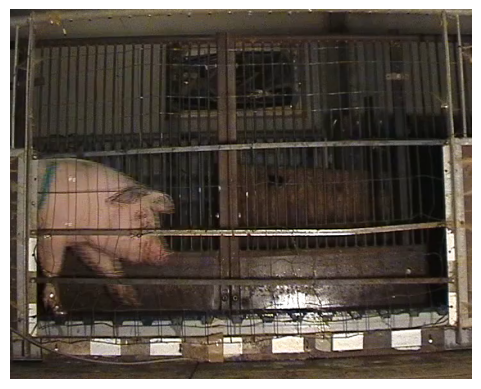

In [19]:
cap_glas = cv2.VideoCapture('output.mp4') #opening the video file
cap_glas.release() #releasing the video capture object
# Displaying the first frame of the video
cap_glas = cv2.VideoCapture('output.mp4')
ret, frame = cap_glas.read() #reading the first frame
if ret:
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #converting BGR to RGB for displaying
    plt.axis('off') #turning off the axis
    plt.show() #showing the frame

python(66983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Extracting frames:   0%|          | 0/25 [00:00<?, ?it/s]

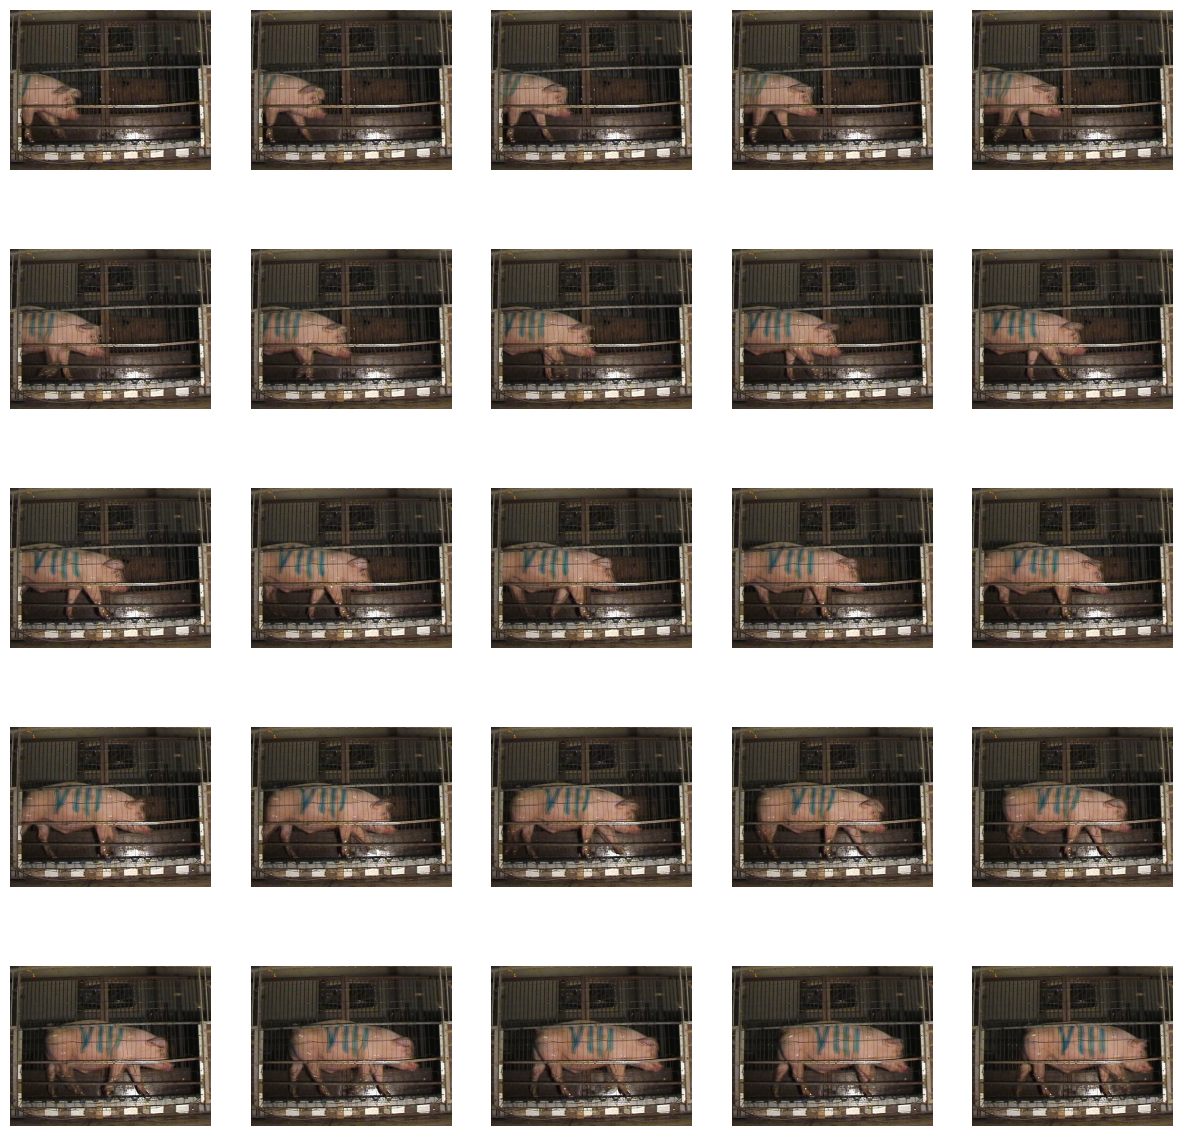

In [26]:
#Display Multiple Frames from teh video 
fig, axs =plt.subplots(5,5,figsize=(15,15)) #creating a 5x5 grid of subplots
axs = axs.flatten() #flattening the 2D array of axes to 1D
cap_glas = cv2.VideoCapture('output.mp4') #opening the video file
n_frames = int(cap_glas.get(cv2.CAP_PROP_FRAME_COUNT)) #getting the total number of frames in the video
for i in tqdm(range(25), desc="Extracting frames"):
    ret, frame = cap_glas.read() #reading the frame
    if ret:
        axs[i].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #converting BGR to RGB for displaying
        axs[i].axis('off') #turning off the axis



In [ ]:
ipd.Video('/Users/gagandeshad/Desktop/Thesis/PIGS161119/000067/color.mp4', width=400, height=300) #displaying the video Edinburgh

In [15]:
print(cv2.VideoCapture('/Users/gagandeshad/Desktop/Thesis/PIGS161119/000067/color.mp4').get(cv2.CAP_PROP_FPS)) #frames per second
#height and width of the video
height = cv2.VideoCapture('/Users/gagandeshad/Desktop/Thesis/PIGS161119/000067/color.mp4').get(cv2.CAP_PROP_FRAME_HEIGHT) #height of the video
width = cv2.VideoCapture('/Users/gagandeshad/Desktop/Thesis/PIGS161119/000067/color.mp4').get(cv2.CAP_PROP_FRAME_WIDTH) #width of the video
print(f"Video dimensions: {width}x{height}")

30.0
Video dimensions: 1280.0x720.0


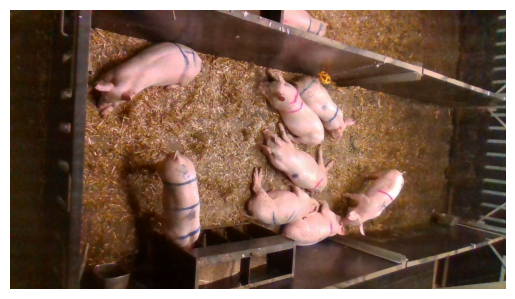

In [18]:
cap_edin = cv2.VideoCapture('/Users/gagandeshad/Desktop/Thesis/PIGS161119/000067/color.mp4') #opening the video file
cap_edin.release() #releasing the video capture object
# Displaying the first frame of the video
cap_edin = cv2.VideoCapture('/Users/gagandeshad/Desktop/Thesis/PIGS161119/000067/color.mp4')
ret, frame = cap_edin.read() #reading the first frame
if ret:
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #converting BGR to RGB for displaying
    plt.axis('off') #turning off the axis
    plt.show() #showing the frame

In [ ]:
#Total Frames

cap_edin = cv2.VideoCapture('/Users/gagandeshad/Desktop/Thesis/PIGS161119/000067/color.mp4') #opening the video file
n_frames = int(cap_edin.get(cv2.CAP_PROP_FRAME_COUNT)) #getting the total number of frames in the video
print(f"Total frames: {n_frames}")

Total frames: 1800


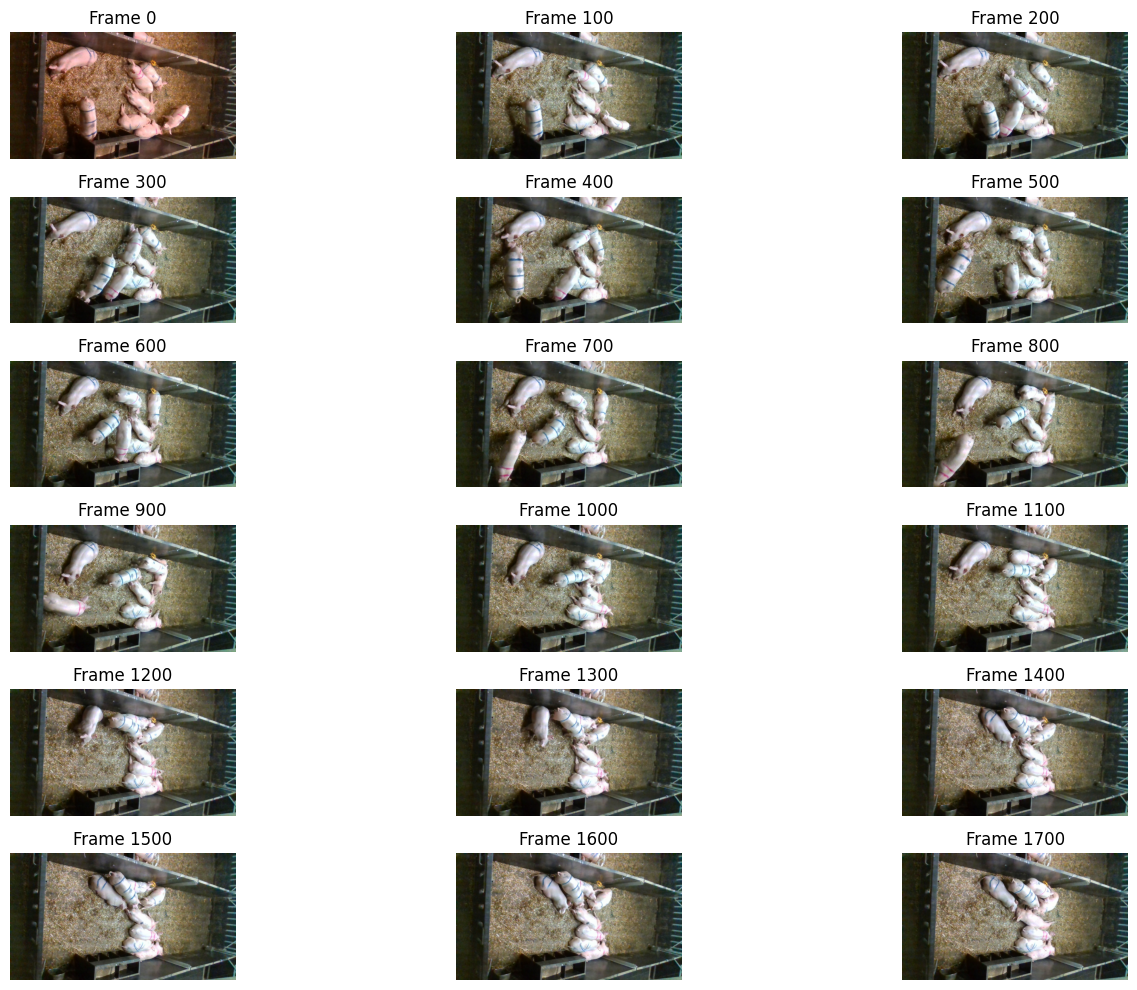

In [33]:
frames = []
frame_numbers = []

for i in range(n_frames):
    ret, frame = cap_edin.read()
    if not ret:
        break  # Break if the video ends prematurely
    if i % 100 == 0:  # Every 100th frame
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
        frames.append(frame_rgb)
        frame_numbers.append(i)

cap_edin.release()  # Release the video capture object

# Plot every 100th frame in a grid
n_frames_to_plot = len(frames)
n_cols = 3  # Number of columns in the grid
n_rows = (n_frames_to_plot // n_cols) + (1 if n_frames_to_plot % n_cols != 0 else 0)

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for idx, (frame, frame_num) in enumerate(zip(frames, frame_numbers)):
    plt.subplot(n_rows, n_cols, idx + 1)
    plt.imshow(frame)
    plt.title(f"Frame {frame_num}")
    plt.axis('off')

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gagandeshad/Desktop/Thesis/PIGS161119/000067/labels.csv'

In [ ]:
labels.head() #displaying the first 5 rows of the labels file